In [559]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [560]:
df = pd.read_excel('./crawling_files/artprice_total_20241014.xlsx', engine='openpyxl')
df.head()

title author       year      standard genre technique    source  \
0    추경산수    이상범  1969년(갑진)      61×127cm    회화  종이에 수묵담채       칸옥션   
1    하경산수    이상범  1969년(갑진)  135.1×68.8cm    회화  종이에 수묵담채      서울옥션   
2    추경산수    이상범  1969년(갑진)      120×34cm    회화      견본채색      아이옥션   
3  괴석에 국화    이상범       1946    125×31.5cm    회화  종이에 수묵담채  에이옥션 온라인   
4   추경산수도    이상범       1965       31×64cm    회화  종이에 수묵담채    마이아트옥션   

         date        price  
0  2022/12/23  ￦70,000,000  
1  2022/12/20  ￦21,000,000  
2  2022/12/06   ￦2,200,000  
3  2022/11/24   ￦1,900,000  
4  2022/11/17  ￦12,000,000

In [561]:
df.isnull().sum()

title          0
author         0
year         330
standard       0
genre          0
technique     57
source         0
date           0
price          0
dtype: int64

# ARTPRICE

## Author

'이상범':0, '남관':1, '이응노':2, '전광영':3, '김정희':4, '서세옥':5, '이성자':6, '김기창':7

In [562]:
print(df['author'].unique())

['이상범' '남관' '이응노' '전광영' '김정희' '오세창' '서세옥' '이성자' '김기창' '이승오']


In [563]:
df['author'] = df['author'].map({'이상범':0, '남관':1, '이응노':2, '전광영':3, '김정희':4, '서세옥':5, '이성자':6, '김기창':7})
# 2. 매핑되지 않은 저자 NaN 처리 후 숫자 -1로 대체
df['author'] = df['author'].fillna(-1).astype(int)

df = df.astype({'author':'int'})

df.head()

title  author       year      standard genre technique    source  \
0    추경산수       0  1969년(갑진)      61×127cm    회화  종이에 수묵담채       칸옥션   
1    하경산수       0  1969년(갑진)  135.1×68.8cm    회화  종이에 수묵담채      서울옥션   
2    추경산수       0  1969년(갑진)      120×34cm    회화      견본채색      아이옥션   
3  괴석에 국화       0       1946    125×31.5cm    회화  종이에 수묵담채  에이옥션 온라인   
4   추경산수도       0       1965       31×64cm    회화  종이에 수묵담채    마이아트옥션   

         date        price  
0  2022/12/23  ￦70,000,000  
1  2022/12/20  ￦21,000,000  
2  2022/12/06   ￦2,200,000  
3  2022/11/24   ￦1,900,000  
4  2022/11/17  ￦12,000,000

## Standard

가로*세로 곱한 값을 가져와서 '넓이'로 만든다.
결측치 있는 것은 drop?

In [564]:
df[df['standard'].isnull()]

Empty DataFrame
Columns: [title, author, year, standard, genre, technique, source, date, price]
Index: []

결측치 데이터 3개 있어서 drop함

In [565]:
df.dropna(subset=['standard'], inplace=True)
df[df['standard'].isnull()]

Empty DataFrame
Columns: [title, author, year, standard, genre, technique, source, date, price]
Index: []

데이터는 대개 다음과 같은 형태로 구성된다.

1. {숫자}x{숫자}cm : 대부분
2. {숫자}x{숫자}, {숫자}x{숫자}....
3. 지름 {숫자}cm
4. 지름 {숫자}x{숫자}

In [566]:
df = df[~df['standard'].str.contains('☓')]
df = df[~df['standard'].str.contains(':')]
df = df[~df['standard'].str.contains('지름')]
df = df[~df['standard'].str.contains('a.')]
df = df[~df['standard'].str.contains(',')]
df = df[~df['standard'].str.contains('외')]
df = df[~df['standard'].str.contains("\(")]
df = df[~df['standard'].str.contains("/")]
df = df[df['standard'].str.contains("×")]
df.reset_index(drop=True, inplace=True)
df

title  author       year      standard genre technique      source  \
0         추경산수       0  1969년(갑진)      61×127cm    회화  종이에 수묵담채         칸옥션   
1         하경산수       0  1969년(갑진)  135.1×68.8cm    회화  종이에 수묵담채        서울옥션   
2         추경산수       0  1969년(갑진)      120×34cm    회화      견본채색        아이옥션   
3       괴석에 국화       0       1946    125×31.5cm    회화  종이에 수묵담채    에이옥션 온라인   
4        추경산수도       0       1965       31×64cm    회화  종이에 수묵담채      마이아트옥션   
...        ...     ...        ...           ...   ...       ...         ...   
1209      바보화조       7       1982     62×71.5cm    판화       석판화    에이옥션 온라인   
1210      청록산수       7       1982   64.5×85.5cm    판화       석판화    에이옥션 온라인   
1211  문자도(文字圖)       7       1982     72.5×98cm    판화       석판화    아이옥션 온라인   
1212         무       7       1982     15×54.9cm    회화    종이에 수묵  아트데이옥션 온라인   
1213       군마도       7       1982   14.2×53.3cm    회화    종이에 수묵  아트데이옥션 온라인   

            date        price  
0     2022/12/23  ￦70,000,000  
1     2022/12/20  ￦21,000,000  
2     2022/12/06   ￦2,200,000  
3     2022/11/24   ￦1,900,000  
4     2022/11/17  ￦12,000,000  
...          ...          ...  
1209  2019/11/14     ￦260,000  
1210  2019/11/14     ￦320,000  
1211  2019/11/12     ￦140,000  
1212  2019/11/06     ￦650,000  
1213  2019/11/06     ￦550,000  

[1214 rows x 9 columns]

In [567]:
df['area']=0
for j in range(len(df)):
    text = df['standard'][j]
    height = text.split('×')[0]
    width = text.split('×')[1]
    height = float(height)
    if 'cm' in width:
        width = float(width[:-2])
    else:
        width = float(width)
    df['area'][j] = height*width

/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/521530798.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['area'][j] = height*width
/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/521530798.py:11: Se

## genre

In [568]:
df = df.replace(['회화', '판화', '서예', '서예-현판', '기타', '입체', '공예', '사진/미디어', '공예-도자기'],[0,1,2,3,4,5,6,7,8])
df.head()

/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/2420608466.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['회화', '판화', '서예', '서예-현판', '기타', '입체', '공예', '사진/미디어', '공예-도자기'],[0,1,2,3,4,5,6,7,8])


title  author       year      standard  genre technique    source  \
0    추경산수       0  1969년(갑진)      61×127cm      0  종이에 수묵담채       칸옥션   
1    하경산수       0  1969년(갑진)  135.1×68.8cm      0  종이에 수묵담채      서울옥션   
2    추경산수       0  1969년(갑진)      120×34cm      0      견본채색      아이옥션   
3  괴석에 국화       0       1946    125×31.5cm      0  종이에 수묵담채  에이옥션 온라인   
4   추경산수도       0       1965       31×64cm      0  종이에 수묵담채    마이아트옥션   

         date        price     area  
0  2022/12/23  ￦70,000,000  7747.00  
1  2022/12/20  ￦21,000,000  9294.88  
2  2022/12/06   ￦2,200,000  4080.00  
3  2022/11/24   ￦1,900,000  3937.50  
4  2022/11/17  ￦12,000,000  1984.00

## technique

바탕재 : 목탄, 신문지, 종이, 직물, 캔버스, 하드보드, 한지, 도자기, 세라믹, 테라코타, 메소나이트, 나무, 낙엽, 은지

재료 : 과슈, 마카, 매직, 사인펜, 색연필, 수묵, 수묵담채, 수채, 연필, 유화, 잉크, 채색, 펜, 혼합재료, 안료, 그라파이트, 아크릴릭, 콩테, 흑연, 콜라주, 먹, 수묵채색, 새김, 크레파스, 에나멜, 오일파스텔

프린트, 스크린, 부채, 포스터, 탁본, 인쇄, 지본묵서, 판화, 접선, 장지, 신문 = 종이
카드보드 = 하드보드
드라이포인트,아쿼틴트, 에칭,믹소그라피아, 믹소그라피, 믹소그래프  = 금속
디아섹 = 아크릴
천, 비단, 세리그라프, 에코백, 면, 견, 마포, 마대, 모시, 린넨, 금견, 코튼, = 직물
도자, 세라믹 = 도자기
목판인쇄본 = 나무
켄버스 = 캔버스

유채 = 유화+채색


In [569]:
tech_dictionary = {'프린트': '종이', '스크린':'종이', '부채': '종이', '탁본' : '종이', '인쇄':'종이', '지본묵서': '종이',
             '판화': '종이', '접선':'종이', '지본수묵':'종이', '포스터':'종이','장지': '종이', '신문': '종이', '지도':'종이', 
            
            '카드보드':'하드보드', 
                   
             '드라이포인트': '금속', '아쿼틴트': '금속', '에칭': '금속','믹소그라피아': '금속','믹소그라피': '금속',
                   
            '믹소그래프': '금속','디아섹': '아크릴', 
            '천': '직물', '비단': '직물', '세리그라프': '직물','세리그래프':'직물','에코백': '직물', 
            '면': '직물', '견': '직물', '마포': '직물', '마대': '직물', '모시': '직물', '린넨': '직물', '금견': '직물', 
            '코튼': '직물', 
            '도자에': '세라믹', '도자기': '세라믹', '목판인쇄본': '나무', '켄버스':'캔버스',
            '그라파이트' : '흑연',
            '나뭇잎' : '낙엽',  
            '먹' : '수묵',
            '수묵채색' : '수묵담채',
            '유채':'유화 채색'}

tech_dictionary.items()

def tech_replace(text, dic):
    for i, j in dic.items():
        text = text.replace(i,j)
    return text

for i in range(len(df)):
    text = str(df['technique'][i])
#     print("Previous : ", text)
    new_text = tech_replace(text, tech_dictionary)
#     print(new_text)
    df['technique'][i] = new_text

/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/1984335411.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['technique'][i] = new_text
/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/1984335411.py:31:

In [570]:
base_material = ['목탄', '종이',  '직물',  '캔버스', '하드보드', '한지', 
                 '세라믹', '테라코타', '메소나이트', '나무', '낙엽', '은지', '금속']

material = ['과슈', '마카', '매직', '사인펜', '색연필', '수묵', '수묵담채', '수채', '연필', '유화', '잉크', 
            '채색', '펜', '혼합재료', '안료', '그라파이트', '아크릴', '콩테', '콜라주', '새김', 
            '크레파스', '에나멜', '오일파스텔']
arr = ['목탄', '종이', '직물', '캔버스', '하드보드', '한지','세라믹', '테라코타', '메소나이트', '나무', '낙엽', '은지', '금속',
       '과슈', '마카', '매직', '사인펜', '색연필', '수묵', '수묵담채', '수채', '연필', '유화', '유채', '잉크', '채색', '펜', 
       '혼합재료', '안료', '흑연', '아크릴', '콩테', '콜라주', '새김', '크레파스', '에나멜', '오일파스텔']
tech_iter = ['base_charcoal', 'base_paper', 'base_fiber', 'base_canvas', 'base_hardboard', 'base_hanji', 'base_ceramic',
            'base_terracotta', 'base_masonite', 'base_wood', 'base_leaf', 'base_silverpaper', 'base_metal',
            'mate_gouache', 'mate_maca', 'mate_magic', 'mate_signpen', 'mate_colorpencil', 'mate_korean_ink', 'mate_korean_ink_and_color',
            'mate_watercolor', 'mate_pencil', 'mate_oil', 'mate_oil_and_color', 'mate_ink', 'mate_color', 'mate_pen', 'mate_mixture',
            'mate_pigment', 'mate_graphite', 'mate_acrylic', 'mate_conte', 'mate_collage', 'mate_engrave', 'mate_crayon', 'mate_enamel',
            'mate_oilpastel']
print(len(arr))
print(len(tech_iter))

37
37


In [571]:
df['base_charcoal'] = 0
df['base_paper'] = 0
df['base_fiber'] = 0
df['base_canvas'] = 0
df['base_hardboard'] = 0
df['base_hanji'] = 0
df['base_ceramic'] = 0
df['base_terracotta'] = 0
df['base_masonite'] = 0
df['base_wood'] = 0
df['base_leaf'] = 0
df['base_silverpaper'] = 0
df['base_metal'] = 0

df['mate_gouache'] = 0
df['mate_maca'] = 0
df['mate_magic'] = 0
df['mate_signpen'] = 0
df['mate_colorpencil'] = 0
df['mate_korean_ink'] = 0
df['mate_korean_ink_and_color'] = 0
df['mate_watercolor'] = 0
df['mate_pencil'] = 0
df['mate_oil'] = 0
df['mate_oil_and_color'] = 0
df['mate_ink'] = 0
df['mate_color'] = 0
df['mate_pen'] = 0
df['mate_mixture'] = 0
df['mate_pigment'] = 0 #안료
df['mate_graphite'] = 0
df['mate_acrylic'] = 0
df['mate_conte'] = 0
df['mate_collage'] = 0
df['mate_engrave'] = 0 #새김
df['mate_crayon'] = 0 #크레파스
df['mate_enamel'] = 0
df['mate_oilpastel'] = 0

In [572]:
df_copy = df.copy()

In [573]:
for i in range(0, len(df_copy)):
    text = str(df_copy['technique'][i])
    for j in range(0, len(arr)):
        if arr[j] in text:
            df_copy[tech_iter[j]][i]=1
            continue

/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/2715309908.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_copy[tech_iter[j]][i]=1
/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/2715309908.py:5: Sett

In [574]:
df_copy['base_paper'].value_counts()

base_paper
1    860
0    354
Name: count, dtype: int64

In [575]:
for word in tech_iter:
    print(word)
    print(df_copy[word].value_counts())

base_charcoal
base_charcoal
0    1212
1       2
Name: count, dtype: int64
base_paper
base_paper
1    860
0    354
Name: count, dtype: int64
base_fiber
base_fiber
0    1096
1     118
Name: count, dtype: int64
base_canvas
base_canvas
0    1133
1      81
Name: count, dtype: int64
base_hardboard
base_hardboard
0    1214
Name: count, dtype: int64
base_hanji
base_hanji
0    1164
1      50
Name: count, dtype: int64
base_ceramic
base_ceramic
0    1212
1       2
Name: count, dtype: int64
base_terracotta
base_terracotta
0    1214
Name: count, dtype: int64
base_masonite
base_masonite
0    1214
Name: count, dtype: int64
base_wood
base_wood
0    1188
1      26
Name: count, dtype: int64
base_leaf
base_leaf
0    1214
Name: count, dtype: int64
base_silverpaper
base_silverpaper
0    1214
Name: count, dtype: int64
base_metal
base_metal
0    1214
Name: count, dtype: int64
mate_gouache
mate_gouache
0    1201
1      13
Name: count, dtype: int64
mate_maca
mate_maca
0    1214
Name: count, dtype: int64
mate_m

In [576]:
df = df_copy

## source

K옥션 = 0 0
K옥션 온라인 = 0 1
서울옥션(홍콩, 블루) = 1 0
서울옥션 온라인 = 1 1
아트데이옥션 = 2 0
아트데이옥션 온라인 = 2 1
아이옥션 = 3 0
아이옥션 온라인 = 3 1
마이아트옥션 = 4 0
마이아트옥션 온라인 = 4 1
에이옥션 온라인 = 5 1
칸옥션 = 6 0
꼬모옥션 온라인 = 7 1

In [577]:
df['source'].value_counts()

source
K옥션 온라인       396
K옥션           150
서울옥션          131
에이옥션 온라인      125
아이옥션           99
서울옥션 온라인       82
아트데이옥션 온라인     65
칸옥션            47
아이옥션 온라인       46
마이아트옥션         42
아트데이옥션         13
마이아트옥션 온라인     12
꼬모옥션 온라인        5
서울옥션 홍콩         1
Name: count, dtype: int64

In [578]:
df['online'] = 0
for i in range(0, len(df)):
    if '온라인' in df['source'][i]:
        df['online'][i] = 1

/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/2073686585.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['online'][i] = 1
/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/2073686585.py:4: SettingWith

In [579]:
df['online'].value_counts()

online
1    731
0    483
Name: count, dtype: int64

In [580]:
df = df.replace(['K옥션 온라인', 'K옥션'],[0,0])
df = df.replace(['서울옥션', '서울옥션 온라인', '서울옥션 홍콩', '서울옥션 블루'],[1, 1, 1, 1])
df = df.replace(['아트데이옥션 온라인', '아트데이옥션'],[2, 2])
df = df.replace(['아이옥션 온라인', '아이옥션'],[3, 3])
df = df.replace(['마이아트옥션 온라인', '마이아트옥션'],[4, 4])
df = df.replace(['에이옥션 온라인', '칸옥션', '꼬모옥션 온라인'],[5,6,7])

df['source'].value_counts()

/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/4100057745.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['에이옥션 온라인', '칸옥션', '꼬모옥션 온라인'],[5,6,7])


source
0    546
1    214
3    145
5    125
2     78
4     54
6     47
7      5
Name: count, dtype: int64

## price

In [581]:
df['price']

0       ￦70,000,000
1       ￦21,000,000
2        ￦2,200,000
3        ￦1,900,000
4       ￦12,000,000
           ...     
1209       ￦260,000
1210       ￦320,000
1211       ￦140,000
1212       ￦650,000
1213       ￦550,000
Name: price, Length: 1214, dtype: object

In [582]:
for i in range(0, len(df)):
    text = df['price'][i]
    text = text.replace('￦','')
    text=  text.replace(',', '')
    df['price'][i] = text
df['price']

/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/3612848860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i] = text
/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/3612848860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i] = text
/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/3612848860.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']

0       70000000
1       21000000
2        2200000
3        1900000
4       12000000
          ...   
1209      260000
1210      320000
1211      140000
1212      650000
1213      550000
Name: price, Length: 1214, dtype: object

## Year

결측치는 해당 작가가 출품한 작품이 제일 많은 해의 연도를 삽입할 예정

~ 처리된 것은 맨 마지막 값을 제작연도로 계산함. Ex.1993~95 면 1995가 됨

월/일이 표시된 것은 해당 연도를 제작연도로 계산함. Ex.1997.10면 1997이 됨

, 처리된 것은 큰 값을 제작연도로 계산함 Ex. 1995, 1996이면 1996이 됨

~년대 인 경우 해당 시대의 맨 마지막 연도로 계산함. Ex. 1980년대 면 1989년이 됨

~년경 인 경우 해당 연도를 제작연도로 계산함 Ex. 1991년경 이면 1991년이 됨

연도에 문자가 섞인 경우 문자를 제거 Ex. b.1998면 1998년이 됨

연도 미상인 것들이 많고 작가의 생몰년도가 정확한 경우 작가의 사망연도를 제작연도로 함. Ex. 정선의 사망연도가 1759년이므로 정선 작품 중 제작연도를 알 수 없는 것들은 모두 1759년으로 함.


In [583]:
row_count = 0

for author in range(len(df['author'].unique())):
    di = dict(df[df['author'] == author]['year'].value_counts())
    max_year = str(max(di, key=di.get)) if di else 'Unknown'

    if author == 19:
        max_year = 1759  # 정선 사망 연도가 1759
    elif author == 26:
        max_year = 1856  # 김정희 사망 연도가 1856
    elif '년대' in max_year:
        max_year = int(max_year[:3] + '9')
    elif '세기' in max_year:
        century = int(max_year.split('세기')[0])
        max_year = (century - 1) * 100 + 50  # 예시로 세기 중간 값을 사용 (150년대)
    else:
        try:
            max_year = int(max_year)
        except ValueError:
            print(f"Unable to convert year: {max_year}")
            max_year = None

    print(author, max_year)

    # 각 행을 반복하면서 데이터프레임의 값을 업데이트
    author_rows = df[df['author'] == author].index
    for row_idx in author_rows:
        year_text = str(df.at[row_idx, 'year'])

        if len(year_text) == 3:
            year = max_year
        elif '~' in year_text:
            year = year_text.split('~')[0][:2] + year_text.split('~')[1][:2]
        elif '/' in year_text:
            year = year_text[:4]
        elif '.' in year_text:
            year = year_text[:4]
        elif ',' in year_text:
            year = max(year_text.split(','))
        elif '년대 초반' in year_text:
            year = year_text[:3] + '2'
        elif '년대 중반' in year_text:
            year = year_text[:3] + '6'
        elif '년대 후반' in year_text:
            year = year_text[:3] + '9'
        elif '년대' in year_text:
            year = year_text[:3] + '9'
        elif '년경' in year_text:
            year = year_text[:4]
        elif 'a' in year_text or 'b' in year_text or 'c' in year_text:
            year = year_text[2:]
        elif '세기' in year_text:
            year = int(year_text.split('세기')[0]) * 100 + 50  # 세기 중간 값을 사용 (예: 19세기 -> 1850)
        elif '(' in year_text:
            year = year_text[:4]
        else:
            try:
                year = int(year_text)
            except ValueError:
                print(f"Unable to convert year: {year_text}")
                year = max_year

        df.at[row_idx, 'year'] = year
        row_count += 1


0 1965
1 1963
2 1972
3 2007
4 1850
5 1976
6 1963
7 1981
Unable to convert year: Unknown
8 None


In [584]:
df.drop(['title', 'standard', 'technique'], axis='columns', inplace=True)

In [585]:
df.head()
df.to_excel('preprocessing_art_feature.xlsx')

# Merging Economic Feature

주식 : KOSPI(Clear)

BTC : Upbit(데이터 기간이 일치하지 않음) -> Coinbase?

부동산 : KB월간주택가격동향

환율 : USD_KRW(Clear)

원유 : WTI유 선물내역(Clear)

기존 df에 merge할 예정

In [586]:
df = pd.read_excel('preprocessing_art_feature.xlsx', engine='openpyxl')

In [587]:
df['date'] = pd.to_datetime(df['date'])

## Merge KOSPI

In [588]:
kospi = pd.read_csv('economic_historical_data/KOSPI_2024.csv', encoding='utf-8')
#kospi = pd.read_csv('economic_historical_data/KOSPI_20160101~20211112.csv', encoding='utf-8')
kospi.head()

일자       종가     대비   등락률       시가       고가       저가        거래량  \
0  2021/11/12  2968.80  43.88  1.50  2945.95  2973.84  2938.27  665733196   
1  2021/11/11  2924.92  -5.25 -0.18  2911.41  2925.19  2903.72  572859058   
2  2021/11/10  2930.17 -32.29 -1.09  2947.46  2958.61  2924.36  570931752   
3  2021/11/09  2962.46   2.26  0.08  2958.15  2987.28  2949.17  708773471   
4  2021/11/08  2960.20  -9.07 -0.31  2965.36  2968.18  2930.90  560205356   

             거래대금            상장시가총액  
0  12472956374638  2185439467790075  
1  13468395643103  2153082343088190  
2   9663221463613  2157022729552783  
3   9684977252764  2180787959345307  
4  10388089493103  2178020380431059

In [589]:
kospi.drop(['시가','고가','저가','거래량','변동 %'], axis='columns', inplace=True)


In [590]:
kospi = kospi.rename(columns={'날짜': 'date', '종가':'KOSPI_Close'})
kospi['date'] = pd.to_datetime(kospi['date'])

In [591]:
kospi

date  KOSPI_Close
0    2021-11-12      2968.80
1    2021-11-11      2924.92
2    2021-11-10      2930.17
3    2021-11-09      2962.46
4    2021-11-08      2960.20
...         ...          ...
1233 2016-11-07      1997.58
1234 2016-11-04      1982.02
1235 2016-11-03      1983.80
1236 2016-11-02      1978.94
1237 2016-11-01      2007.39

[1238 rows x 2 columns]

In [592]:

# 4. KOSPI_Close 열에서 쉼표 제거 및 숫자로 변환
kospi['KOSPI_Close'] = kospi['KOSPI_Close'].replace(',', '', regex=True)  # 쉼표 제거
kospi['KOSPI_Close'] = pd.to_numeric(kospi['KOSPI_Close'], errors='coerce')  # 숫자로 변환, 변환 불가능한 값은 NaN 처리

# KOSPI 데이터 병합 (중복 열이 없도록 사전에 확인)
kospi_columns_to_merge = ['date', 'KOSPI_Close']
df = pd.merge(df, kospi[kospi_columns_to_merge], on='date', how='left')

# 5. year_month 열 생성 (연도-월 형식)
df['year_month'] = df['date'].dt.to_period('M')

# 6. 결측값을 해당 연도-월의 평균값으로 채우기
df['KOSPI_Close'] = df.groupby('year_month')['KOSPI_Close'].transform(lambda x: x.fillna(x.mean()))

# 7. 사용한 year_month 열 삭제
df.drop(columns=['year_month'], inplace=True)

# Unnamed 열이 있는 경우 제거 (병합 이후에 남아있는 경우)
if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis='columns', inplace=True)

# 결과 확인
print(df[['date', 'KOSPI_Close']].head())

        date  KOSPI_Close
0 2022-12-23          NaN
1 2022-12-20          NaN
2 2022-12-06          NaN
3 2022-11-24          NaN
4 2022-11-17          NaN


In [593]:
df

author  year  genre  source       date     price     area  \
0          0  1969      0       6 2022-12-23  70000000  7747.00   
1          0  1969      0       1 2022-12-20  21000000  9294.88   
2          0  1969      0       3 2022-12-06   2200000  4080.00   
3          0  1946      0       5 2022-11-24   1900000  3937.50   
4          0  1965      0       4 2022-11-17  12000000  1984.00   
...      ...   ...    ...     ...        ...       ...      ...   
1209       7  1982      1       5 2019-11-14    260000  4433.00   
1210       7  1982      1       5 2019-11-14    320000  5514.75   
1211       7  1982      1       3 2019-11-12    140000  7105.00   
1212       7  1982      0       2 2019-11-06    650000   823.50   
1213       7  1982      0       2 2019-11-06    550000   756.86   

      base_charcoal  base_paper  base_fiber  ...  mate_graphite  mate_acrylic  \
0                 0           1           0  ...              0             0   
1                 0           1           0  ...              0             0   
2                 0           0           1  ...              0             0   
3                 0           1           0  ...              0             0   
4                 0           1           0  ...              0             0   
...             ...         ...         ...  ...            ...           ...   
1209              0           1           0  ...              0             0   
1210              0           1           0  ...              0             0   
1211              0           1           0  ...              0             0   
1212              0           1           0  ...              0             0   
1213              0           1           0  ...              0             0   

      mate_conte  mate_collage  mate_engrave  mate_crayon  mate_enamel  \
0              0             0             0            0            0   
1              0             0             0            0            0   
2              0             0             0            0            0   
3              0             0             0            0            0   
4              0             0             0            0            0   
...          ...           ...           ...          ...          ...   
1209           0             0             0            0            0   
1210           0             0             0            0            0   
1211           0             0             0            0            0   
1212           0             0             0            0            0   
1213           0             0             0            0            0   

      mate_oilpastel  online  KOSPI_Close  
0                  0       0          NaN  
1                  0       0          NaN  
2                  0       0          NaN  
3                  0       1          NaN  
4                  0       0          NaN  
...              ...     ...          ...  
1209               0       1      2139.23  
1210               0       1      2139.23  
1211               0       1      2140.92  
1212               0       1      2144.15  
1213               0       1      2144.15  

[1214 rows x 46 columns]

## Merge Oil

In [594]:
oil = pd.read_csv('economic_historical_data/WTI유 선물 내역.csv')
oil.head()

날짜     종가     오픈     고가     저가      거래량    변동 %
0  2021/11/12  80.72  81.36  81.59  79.80        -  -1.07%
1  2021/11/11  81.59  81.41  82.33  80.20        -   0.31%
2  2021/11/10  81.34  84.53  84.97  80.81  555.22K  -3.34%
3   2021/11/9  84.15  82.16  84.63  81.78  504.83K   2.71%
4   2021/11/8  81.93  81.13  82.67  81.05  393.95K   0.81%

In [595]:
oil.drop(['오픈','고가','저가','거래량','변동 %'], axis='columns', inplace=True)

In [596]:
oil = oil.rename(columns={'날짜': 'date', '종가':'WTI_Close'})
oil['date'] = pd.to_datetime(oil['date'])

# 결과 확인
oil.head()

date  WTI_Close
0 2021-11-12      80.72
1 2021-11-11      81.59
2 2021-11-10      81.34
3 2021-11-09      84.15
4 2021-11-08      81.93

In [597]:
# df와 oil 데이터 병합
df = pd.merge(df, oil, on='date', how='left')

# df의 열 이름 확인
print(df.columns)


Index(['author', 'year', 'genre', 'source', 'date', 'price', 'area',
       'base_charcoal', 'base_paper', 'base_fiber', 'base_canvas',
       'base_hardboard', 'base_hanji', 'base_ceramic', 'base_terracotta',
       'base_masonite', 'base_wood', 'base_leaf', 'base_silverpaper',
       'base_metal', 'mate_gouache', 'mate_maca', 'mate_magic', 'mate_signpen',
       'mate_colorpencil', 'mate_korean_ink', 'mate_korean_ink_and_color',
       'mate_watercolor', 'mate_pencil', 'mate_oil', 'mate_oil_and_color',
       'mate_ink', 'mate_color', 'mate_pen', 'mate_mixture', 'mate_pigment',
       'mate_graphite', 'mate_acrylic', 'mate_conte', 'mate_collage',
       'mate_engrave', 'mate_crayon', 'mate_enamel', 'mate_oilpastel',
       'online', 'KOSPI_Close', 'WTI_Close'],
      dtype='object')


In [598]:
# OIL 데이터 병합을 위한 중복된 WTI_Close 열 제거
df.drop(columns=['WTI_Close'], inplace=True)

# df와 oil 데이터 병합
df = pd.merge(df, oil, on='date', how='left')

# WTI_Close 열에서 결측값을 전체 평균값으로 채움
df['WTI_Close'].fillna(df['WTI_Close'].mean(), inplace=True)

# 결과 확인
print(df['WTI_Close'].isna().sum())  # 결측값이 0이어야 함
print(df['WTI_Close'].head())        # 결과 확인


0
0    50.018665
1    50.018665
2    50.018665
3    50.018665
4    50.018665
Name: WTI_Close, dtype: float64


/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/2749425528.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WTI_Close'].fillna(df['WTI_Close'].mean(), inplace=True)


## Merging Exchange Rate

In [599]:
rate = pd.read_csv('economic_historical_data/USD_KRW 내역.csv')
rate

날짜        종가        오픈        고가        저가    변동 %
0     2021/11/12  1,179.94  1,181.03  1,182.35  1,176.45  -0.21%
1     2021/11/11  1,182.39  1,185.15  1,187.30  1,178.17  -0.22%
2     2021/11/10  1,185.04  1,178.51  1,186.15  1,176.82   0.56%
3      2021/11/9  1,178.40  1,180.95  1,182.10  1,173.36  -0.21%
4      2021/11/8  1,180.84  1,181.51  1,186.74  1,178.93  -0.02%
...          ...       ...       ...       ...       ...     ...
1526    2016/1/7  1,197.29  1,200.52  1,204.70  1,193.16  -0.27%
1527    2016/1/6  1,200.52  1,190.81  1,203.80  1,187.59   0.82%
1528    2016/1/5  1,190.81  1,190.35  1,192.80  1,184.40   0.04%
1529    2016/1/4  1,190.35  1,175.66  1,193.23  1,175.65   1.27%
1530    2016/1/1  1,175.45  1,175.94  1,176.50  1,175.19  -0.04%

[1531 rows x 6 columns]

In [600]:
rate.drop(['오픈','고가','저가', '변동 %'], axis='columns', inplace=True)
rate = rate.rename(columns={'날짜': 'date', '종가':'rate_Close'})
rate['date'] = pd.to_datetime(rate['date'])

In [601]:
df = pd.merge(df, rate, on='date', how='left')

# rate_Close 열에서 콤마 제거 및 숫자로 변환, 변환 불가능한 값은 NaN으로 처리
df['rate_Close'] = df['rate_Close'].replace(',', '', regex=True)
df['rate_Close'] = pd.to_numeric(df['rate_Close'], errors='coerce')

# rate_Close 열에서 결측값을 전체 평균값으로 채움
df['rate_Close'].fillna(df['rate_Close'].mean(), inplace=True)

# 결과 확인
print(df['rate_Close'].isna().sum())  # 결측값이 0이어야 함
print(df['rate_Close'].head())      

0
0    1154.754637
1    1154.754637
2    1154.754637
3    1154.754637
4    1154.754637
Name: rate_Close, dtype: float64


/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/2575720732.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate_Close'].fillna(df['rate_Close'].mean(), inplace=True)


## Merging estate

In [602]:
estate_rate = {
    2016:{
        1:94.5, 2:94.6, 3:94.6, 4:94.7,
        5:94.7, 6:94.8, 7:94.9, 8:95.1,
        9:95.2, 10:95.4, 11:95.7, 12:95.7
    },
    2017:{
        1:95.7, 2:95.8, 3:95.8, 4:95.8,
        5:95.9, 6:96.0, 7:96.3, 8:96.5,
        9:96.6, 10:96.7, 11:96.8, 12:96.9,
    },
    2018:{
        1:97.1, 2:97.3, 3:97.5, 4:97.7,
        5:97.8, 6:97.9, 7:98.0, 8:98.2,
        9:99.2, 10:99.8, 11:99.9, 12:100.0,
    },
    2019:{
        1:100.0, 2:99.9, 3:99.83, 4:99.7,
        5:99.6, 6:99.5, 7:99.5, 8:99.6,
        9:99.6, 10:99.7, 11:99.9, 12:100.2,
    },
    2020:{
        1:100.6, 2:100.9, 3:101.5, 4:101.7,
        5:101.9, 6:102.4, 7:103.3, 8:104.1,
        9:104.9, 10:105.6, 11:107.1, 12:108.6,
    },
    2021:{
        1:109.9, 2:111.4, 3:112.8, 4:114.0,
        5:115.1, 6:116.6, 7:118.0, 8:119.8,
        9:121.6, 10:122.9
    }
}

In [603]:
def find_month(i, year):
    if df['date'][i].month == 1:
        return estate_rate[year][1]
    elif df['date'][i].month == 2:
        return estate_rate[year][2]
    elif df['date'][i].month == 3:
        return estate_rate[year][3]
    elif df['date'][i].month == 4:
        return estate_rate[year][4]
    elif df['date'][i].month == 5:
        return estate_rate[year][5]
    elif df['date'][i].month == 6:
        return estate_rate[year][6]
    elif df['date'][i].month == 7:
        return estate_rate[year][7]
    elif df['date'][i].month == 8:
        return estate_rate[year][8]
    elif df['date'][i].month == 9:
        return estate_rate[year][9]
    elif df['date'][i].month == 10:
        return estate_rate[year][10]
    elif df['date'][i].month == 11:
        return estate_rate[year][11]
    elif df['date'][i].month == 12:
        return estate_rate[year][12]

In [604]:
df['estate_rate'] = 0.0
for i in range(len(df)):
    if df['date'][i].year == 2016:
        year = 2016
        df['estate_rate'][i] = find_month(i, year)
    elif df['date'][i].year == 2017:
        year = 2017
        df['estate_rate'][i] = find_month(i, year)
    elif df['date'][i].year == 2018:
        year = 2018
        df['estate_rate'][i] = find_month(i, year)
    elif df['date'][i].year == 2019:
        year = 2019
        df['estate_rate'][i] = find_month(i, year)
    elif df['date'][i].year == 2020:
        year = 2020
        df['estate_rate'][i] = find_month(i, year)
    elif df['date'][i].year == 2021:
        year = 2021
        df['estate_rate'][i] = find_month(i, year)

/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/1370869667.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['estate_rate'][i] = find_month(i, year)
/var/folders/fp/lrpzd_wd1bn_v0ctd40rzmww0000gn/T/ipykernel_13197/1370

## 3. 트렌드데이터 추가

In [605]:
trend_file_path = './crawling_files/Trend_naver_datalab.xlsx'
trend_data = pd.read_excel(trend_file_path)
trend_data.head()

날짜    미술품 경매        날짜.1  미술품 경매업체        날짜.2  미술품 렌탈
0  2016-10-16  30.15873  2016-10-16       0.0  2016-10-16     0.0
1  2016-10-17  39.15343  2016-10-17       0.0  2016-10-17     0.0
2  2016-10-18  29.62962  2016-10-18       0.0  2016-10-18     0.0
3  2016-10-19  18.51851  2016-10-19       0.0  2016-10-19     0.0
4  2016-10-20  17.98941  2016-10-20       0.0  2016-10-20     0.0

### 트랜드 검색결과 변수설정

In [606]:

# 1. 개별 트렌드 변수를 생성 (각각의 열 이름을 새로운 변수로 할당)
trend_data['trend_art_auction'] = trend_data['미술품 경매']
trend_data['trend_art_auction_company'] = trend_data['미술품 경매업체']
trend_data['trend_art_rental'] = trend_data['미술품 렌탈']

# 2. 날짜 형식 맞추기 (df와 trend_data의 날짜 열을 datetime 형식으로 변환)
df['date'] = pd.to_datetime(df['date'])  # df의 'date' 열을 datetime 형식으로 변환
trend_data['날짜'] = pd.to_datetime(trend_data['날짜'])  # trend_data의 '날짜' 열도 datetime 형식으로 변환

# 3. 날짜를 기준으로 df와 trend_data 병합 (세 개의 트렌드 변수 추가)
df = pd.merge(df, trend_data[['날짜', 'trend_art_auction', 'trend_art_auction_company', 'trend_art_rental']],
              left_on='date', right_on='날짜', how='left')

# '날짜' 열 제거 (병합 후 필요 없으므로 제거)
df = df.drop(columns=['날짜'])

# 4. 결측치 처리 (필요에 따라 결측치를 0으로 채우기)
df['trend_art_auction'] = df['trend_art_auction'].fillna(0)
df['trend_art_auction_company'] = df['trend_art_auction_company'].fillna(0)
df['trend_art_rental'] = df['trend_art_rental'].fillna(0)

# 병합된 df 확인
print(df.head())


   author  year  genre  source       date     price     area  base_charcoal  \
0       0  1969      0       6 2022-12-23  70000000  7747.00              0   
1       0  1969      0       1 2022-12-20  21000000  9294.88              0   
2       0  1969      0       3 2022-12-06   2200000  4080.00              0   
3       0  1946      0       5 2022-11-24   1900000  3937.50              0   
4       0  1965      0       4 2022-11-17  12000000  1984.00              0   

   base_paper  base_fiber  ...  mate_enamel  mate_oilpastel  online  \
0           1           0  ...            0               0       0   
1           1           0  ...            0               0       0   
2           0           1  ...            0               0       0   
3           1           0  ...            0               0       1   
4           1           0  ...            0               0       0   

   KOSPI_Close  WTI_Close   rate_Close  estate_rate  trend_art_auction  \
0          NaN  50.01866

In [607]:
## PCA 적용과 모델링

In [608]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### ART PCA적용

   art_PCA1  art_PCA2  art_PCA3
0  1.638582  2.047634  0.689058
1  0.988034  2.501505  0.297426
2  1.528116  1.297077  0.943519
3 -1.227254 -0.136068  2.377198
4  1.586735  1.425576  1.382720


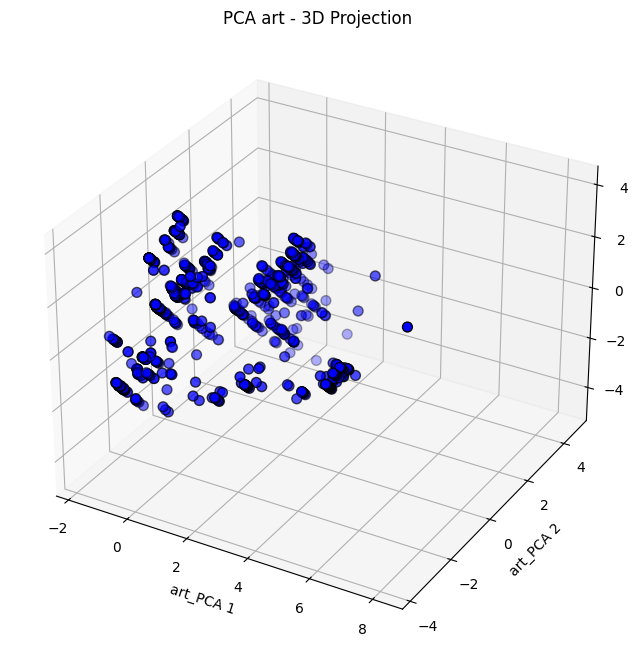

In [609]:
# Art 관련 feature 선택
art_features = ['author', 'year', 'genre', 'source', 'area', 'online']

# 1. One-Hot Encoding (범주형 변수 처리)
categorical_cols = ['author', 'genre', 'source', 'online']  # 범주형 변수
one_hot_encoder = OneHotEncoder(sparse_output=False)  # One-Hot 인코딩

# 카테고리형 변수 인코딩 후 데이터프레임으로 변환
encoded_features = one_hot_encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# 숫자형 변수 선택
numeric_cols = ['year', 'area']  # 숫자형 변수 (year의 문자열 처리 필요)

# 숫자형 데이터프레임과 원핫 인코딩된 데이터 결합
df_numeric = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # 숫자 변환, 에러시 NaN으로 변환
df_preprocessed = pd.concat([df_numeric.reset_index(drop=True), encoded_df], axis=1)

# 결측치 처리 (NaN 값을 평균 또는 0으로 채우기)
df_preprocessed.fillna(0, inplace=True)

# 2. 데이터 스케일링
scaler = StandardScaler()
art_scaled = scaler.fit_transform(df_preprocessed)

# 3. PCA 적용 (3개의 주성분 추출)
pca_art = PCA(n_components=3)
art_pca = pca_art.fit_transform(art_scaled)

# 4. PCA 결과를 데이터프레임에 추가
df['art_PCA1'] = art_pca[:, 0]
df['art_PCA2'] = art_pca[:, 1]
df['art_PCA3'] = art_pca[:, 2]

print(df[['art_PCA1', 'art_PCA2', 'art_PCA3']].head())

# 3D 산점도 시각화 (산점도를 3D로 변경)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 산점도(Scatter plot) 생성
ax.scatter(df['art_PCA1'], df['art_PCA2'], df['art_PCA3'], c='blue', edgecolor='k', s=50)

# 그래프 설정
ax.set_title('PCA art - 3D Projection')
ax.set_xlabel('art_PCA 1')
ax.set_ylabel('art_PCA 2')
ax.set_zlabel('art_PCA 3')

# 그래프 출력
plt.show()


## Economic (경제 지표) PCA적용

   economic_PCA1  economic_PCA2  economic_PCA3
0      -1.760236       1.176937      -0.018569
1      -1.760236       1.176937      -0.018569
2      -1.760236       1.176937      -0.018569
3      -1.760236       1.176937      -0.018569
4      -1.760236       1.176937      -0.018569


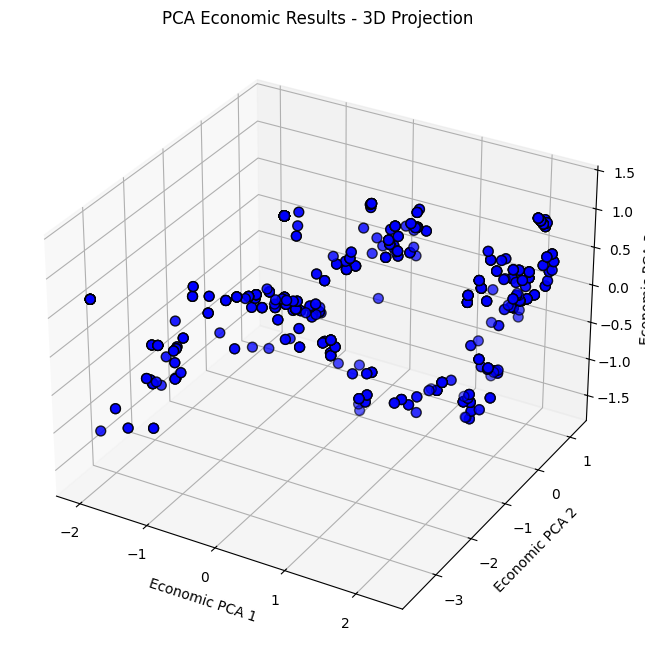

In [610]:
# 경제 지표 열 선택
economic_features = ['KOSPI_Close', 'WTI_Close', 'rate_Close', 'estate_rate']

# 1. 경제 데이터 추출
df_economic = df[economic_features]

# 2. 문자열로 저장된 숫자 값들을 처리 (콤마 제거 및 숫자 변환)
df_economic = df_economic.apply(lambda x: x.str.replace(',', '') if x.dtype == "object" else x)
df_economic = df_economic.apply(pd.to_numeric, errors='coerce')  # 변환 불가능한 값은 NaN 처리

# 3. NaN 값을 0으로 처리
df_economic.fillna(0, inplace=True)

# 4. 데이터 스케일링 (PCA 적용 전)
scaler_economic = StandardScaler()
economic_scaled = scaler_economic.fit_transform(df_economic)

# 5. PCA 적용 (3개의 주성분)
pca_economic = PCA(n_components=3)
economic_pca = pca_economic.fit_transform(economic_scaled)

# 6. 결과를 원래 데이터프레임에 추가
df['economic_PCA1'] = economic_pca[:, 0]
df['economic_PCA2'] = economic_pca[:, 1]
df['economic_PCA3'] = economic_pca[:, 2]

# 최종 결과 확인
print(df[['economic_PCA1', 'economic_PCA2', 'economic_PCA3']].head())

# 3D 산점도 시각화 (산점도를 3D로 변경)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D 산점도(Scatter plot) 생성
ax.scatter(df['economic_PCA1'], df['economic_PCA2'], df['economic_PCA3'], c='blue', edgecolor='k', s=50)

# 그래프 설정
ax.set_title('PCA Economic Results - 3D Projection')
ax.set_xlabel('Economic PCA 1')
ax.set_ylabel('Economic PCA 2')
ax.set_zlabel('Economic PCA 3')

# 그래프 출력
plt.show()


## Trend데이터 PCA적용

   trend_PCA1  trend_PCA2  trend_PCA3
0   -0.782262   -0.309723   -0.356714
1   -0.861588   -0.304873   -0.451838
2   -0.993799   -0.296790   -0.610379
3   -0.914473   -0.301640   -0.515255
4   -0.650052   -0.317806   -0.198173


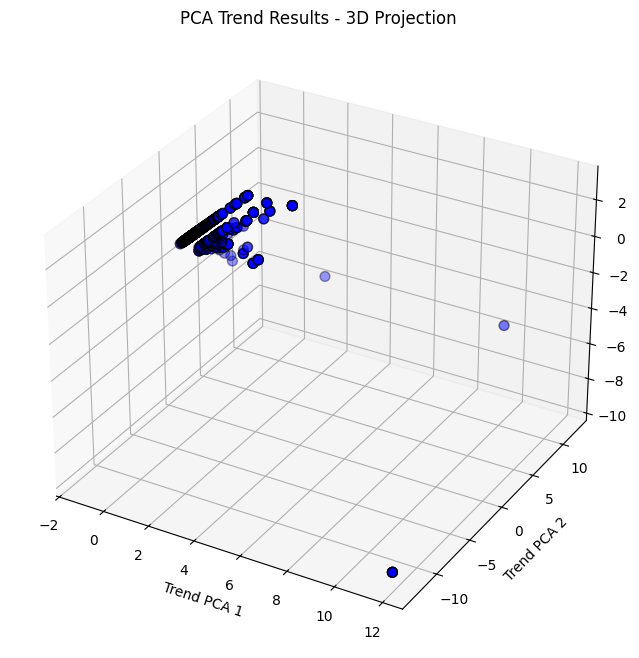

In [611]:
# Trend 관련 feature 선택
trend_features = ['trend_art_auction', 'trend_art_auction_company', 'trend_art_rental']

# Trend 데이터 스케일링
scaler_trend = StandardScaler()
trend_scaled = scaler_trend.fit_transform(df[trend_features])

# PCA 적용 (3개의 주성분)
pca_trend = PCA(n_components=3)
trend_pca = pca_trend.fit_transform(trend_scaled)

# PCA 결과를 데이터프레임에 추가
df['trend_PCA1'] = trend_pca[:, 0]
df['trend_PCA2'] = trend_pca[:, 1]
df['trend_PCA3'] = trend_pca[:, 2]

# PCA 결과 확인
print(df[['trend_PCA1', 'trend_PCA2', 'trend_PCA3']].head())

# 3D 산점도 시각화 (산점도를 3D로 변경)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D 산점도(Scatter plot) 생성
ax.scatter(df['trend_PCA1'], df['trend_PCA2'], df['trend_PCA3'], c='blue', edgecolor='k', s=50)

# 그래프 설정
ax.set_title('PCA Trend Results - 3D Projection')
ax.set_xlabel('Trend PCA 1')
ax.set_ylabel('Trend PCA 2')
ax.set_zlabel('Trend PCA 3')

# 그래프 출력
plt.show()


In [612]:
# 결과 저장
df.to_excel('feature_preprocessed.xlsx')
